In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
X = data.iloc[:, 3:13]
Y = data.iloc[:, 13]

In [9]:
x = pd.unique(X['Geography'])

In [11]:
x

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
geo = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [13]:
X = pd.concat([X,geo,gender],axis=1)

In [14]:
X=X.drop(['Geography','Gender'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [22]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [25]:
classifier = Sequential()

In [29]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

In [30]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [32]:
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid' ))

In [38]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 23s 5ms/step - loss: 0.5593 - accuracy: 0.7967 - val_loss: 0.5018 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5022 - accuracy: 0.7947 - val_loss: 0.4757 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4624 - accuracy: 0.8103 - val_loss: 0.4612 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7909 - val_loss: 0.4530 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4581 - accuracy: 0.7926 - val_loss: 0.4478 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8024 - val_loss: 0.4445 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4502 - accuracy: 0.7905 - val_loss: 0.4420 - val_accuracy: 0.795

In [42]:
print(model_history.history.keys())  

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


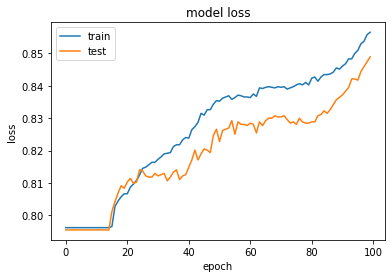

In [46]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [47]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(y_test,y_pred)

In [59]:
cm

array([[1546,   49],
       [ 226,  179]])

In [60]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [61]:
score

0.8625